In [273]:
from random import shuffle, seed
from faker.providers.person.en import Provider
import uuid
import json

first_names = list(set(Provider.first_names))

seed(4321)
shuffle(first_names)

managers_users = []
employees_users = []

# managers
for i in range(50):
    managers_users.append({
        'id': str(uuid.uuid4()),
        'username': first_names[i].lower(),
        'fullname': first_names[i] + ' ' + fake.last_name(),
    })

# employees
for i in range(200):
    employees_users.append({
        'id': str(uuid.uuid4()),
        'username': first_names[i].lower(),
        'fullname': first_names[i] + ' ' + fake.last_name(),
    })

print(managers_users[0])
with open('managers_users.json', 'w') as f:
    json.dump(managers_users, f)
    
print(employees_users[0])
with open('employees_users.json', 'w') as f:
    json.dump(employees_users, f)

{'id': 'c64594a2-b01d-4cc8-a715-6f13889ae366', 'username': 'mabelle', 'fullname': 'Mabelle Grant'}
{'id': 'f6a16358-515b-4c5f-a378-7d5e7bf4f028', 'username': 'mabelle', 'fullname': 'Mabelle Rios'}


In [274]:
import json 
from faker import Faker
import random
from random import randint
fake = Faker('en_US')
import time
import uuid

def str_time_prop(start, end, time_format, prop):
    stime = time.mktime(time.strptime(start, time_format))
    etime = time.mktime(time.strptime(end, time_format))
    ptime = stime + prop * (etime - stime)
    return time.strftime(time_format, time.localtime(ptime))

def random_date(start, end, prop):
    return str_time_prop(start, end, '%d/%m/%Y %I:%M %p', prop)

jobs = []

f = open('managers_users.json')
managers_users = json.load(f)
f.close()
print(managers_users[0])

f = open('employees_users.json')
employees_users = json.load(f)
f.close()
print(employees_users[0])

for _ in range(5000):
    totalPayment = random.randrange(250, 450)
    acceptedByManager = bool(random.getrandbits(1))
    manager = random.randrange(0, 50)
    employee = random.randrange(0, 200)
    if manager == employee:
        manager = manager - 1
    createdAt = random_date("1/1/2022 1:30 PM", "1/12/2023 4:50 AM", random.random())
    timeIn = random_date("1/1/2022 1:30 PM", createdAt, random.random())
    timeOut = random_date("1/1/2022 1:30 PM", date1, random.random())
    jobs.append({
    'Id': str(uuid.uuid4()),
    'Title': fake.job(),
    'Details': fake.text(),
    'Expenses': [],
    'Images': [],
    'CreatedAt': createdAt,
    'UserId': employees_users[employee]['id'],
    'Date': timeIn,
    'TimeIn': timeIn,
    'TimeOut': timeOut,
    'WorkedHours': random.randrange(1, 60),
    'HourlyRate': random.randrange(2, 100),
    'ManagerId': managers_users[manager]['id'],
    'ManagerName': managers_users[manager]['username'],
    'AcceptedByManager': acceptedByManager,
    'AcceptedByEmployee': not acceptedByManager,
    'PaidByNow': random.randrange(10, totalPayment-1),
    'IsFullyPaid': bool(random.getrandbits(1)),
    'TotalPayment': totalPayment,
    'DeletedAt': None,
    })
    
print(jobs[0])
with open('jobs.json', 'w') as f:
    json.dump(jobs, f)

{'id': 'c64594a2-b01d-4cc8-a715-6f13889ae366', 'username': 'mabelle', 'fullname': 'Mabelle Grant'}
{'id': 'f6a16358-515b-4c5f-a378-7d5e7bf4f028', 'username': 'mabelle', 'fullname': 'Mabelle Rios'}
{'Id': '6e6815b3-695d-4e3f-9741-29f4d0d11a84', 'Title': 'Location manager', 'Details': 'Example child if important state. Provide war strong capital account hand provide.\nPattern person job protect information. Even region top seat effort defense.', 'Expenses': [], 'Images': [], 'CreatedAt': '18/10/2023 04:47 AM', 'UserId': 'b758384c-790c-489c-bb5a-480be1a1c1e6', 'Date': '03/09/2022 03:34 PM', 'TimeIn': '03/09/2022 03:34 PM', 'TimeOut': '27/08/2022 10:01 PM', 'WorkedHours': 15, 'HourlyRate': 78, 'ManagerId': '456aa5a1-8ce4-457a-9f89-40f89575adc1', 'ManagerName': 'lainey', 'AcceptedByManager': True, 'AcceptedByEmployee': False, 'PaidByNow': 144, 'IsFullyPaid': True, 'TotalPayment': 360, 'DeletedAt': None}


In [275]:
import json 
import time

def str_to_time(stime):
    return time.mktime(time.strptime(stime, '%d/%m/%Y %I:%M %p'))

def quicksort(a):
    def do_partition(a, start, end):
        # Performs the partitioning of the subarray a[start:end]
         
        # We choose the last element as the pivot
        pivot_idx = end
        pivot = a[pivot_idx]
 
        # Keep an index for the first partition
        # subarray (elements lesser than the pivot element)
        idx = start - 1
 
        def increment_and_swap(j):
            nonlocal idx
            idx += 1
            a[idx], a[j] = a[j], a[idx]
 
        [increment_and_swap(j) for j in range(start, end) if str_to_time(a[j]['CreatedAt']) < str_to_time(pivot['CreatedAt'])]
         
        # Finally, we need to swap the pivot (a[end] with a[idx+1])
        # since we have reached the position of the pivot in the actual
        # sorted array
        a[idx+1], a[end] = a[end], a[idx+1]
 
        # Return the final updated position of the pivot
        # after partitioning
        return idx+1
 
    def quicksort_helper(a, start, end):
        if start < end:
            pivot_idx = do_partition(a, start, end)
            quicksort_helper(a, start, pivot_idx-1)
            quicksort_helper(a, pivot_idx+1, end)
 
    quicksort_helper(a, 0, len(a)-1)

f = open('jobs.json')
data = json.load(f)
f.close()
print(data[0])

print('start sorting')
quicksort(data)
print('finish sorting')

print(data[0])

with open('jobs.json', 'w') as f:
    json.dump(data, f)

{'Id': '6e6815b3-695d-4e3f-9741-29f4d0d11a84', 'Title': 'Location manager', 'Details': 'Example child if important state. Provide war strong capital account hand provide.\nPattern person job protect information. Even region top seat effort defense.', 'Expenses': [], 'Images': [], 'CreatedAt': '18/10/2023 04:47 AM', 'UserId': 'b758384c-790c-489c-bb5a-480be1a1c1e6', 'Date': '03/09/2022 03:34 PM', 'TimeIn': '03/09/2022 03:34 PM', 'TimeOut': '27/08/2022 10:01 PM', 'WorkedHours': 15, 'HourlyRate': 78, 'ManagerId': '456aa5a1-8ce4-457a-9f89-40f89575adc1', 'ManagerName': 'lainey', 'AcceptedByManager': True, 'AcceptedByEmployee': False, 'PaidByNow': 144, 'IsFullyPaid': True, 'TotalPayment': 360, 'DeletedAt': None}
start sorting
finish sorting
{'Id': 'dbabe9d3-638c-4212-841f-08b3236ad0b5', 'Title': 'Sales executive', 'Details': 'Trial base free education. Morning much front toward. Form buy good bring reveal movie anything.', 'Expenses': [], 'Images': [], 'CreatedAt': '01/01/2022 03:22 PM', 'Use

{'Id': 'dbabe9d3-638c-4212-841f-08b3236ad0b5', 'Title': 'Sales executive', 'Details': 'Trial base free education. Morning much front toward. Form buy good bring reveal movie anything.', 'Expenses': [], 'Images': [], 'CreatedAt': '01/01/2022 03:22 PM', 'UserId': '1122774c-6ac4-47c8-968a-623b3249b8d5', 'Date': '01/01/2022 03:06 PM', 'TimeIn': '01/01/2022 03:06 PM', 'TimeOut': '10/08/2022 05:43 AM', 'WorkedHours': 24, 'HourlyRate': 57, 'ManagerId': '269c55b5-09dc-436d-b0b2-bcf1795373b9', 'ManagerName': 'alston', 'AcceptedByManager': False, 'AcceptedByEmployee': True, 'PaidByNow': 78, 'IsFullyPaid': False, 'TotalPayment': 374, 'DeletedAt': None}
start sorting
finish sorting
('8924bca9-7ff9-4ef0-8f8d-f80dd8662207', 39)
('37fd206f-4c98-4b66-ba41-c994226c2526', 38)
('656d1148-b444-410d-8ebb-aeea719339a2', 37)
('b0840229-0c4d-493d-9bd2-620826890954', 36)
('f2462dbf-70aa-47ac-8aca-87a6b61a8b3a', 36)


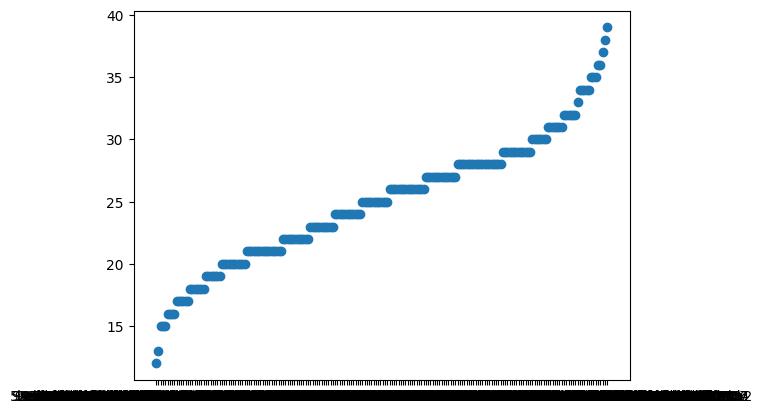

In [276]:
import pandas as pd
import numpy as np
import faker
import matplotlib.pyplot as plt
import datetime
import random

date_time = []
data =[]

f = open('jobs.json')
fileData = json.load(f)
f.close()
print(fileData[0])

dicks = {}

for i in range(5000):
    if fileData[i]['UserId'] in dicks:
        dicks[fileData[i]['UserId']] = dicks.get(fileData[i]['UserId']) + 1
    else :
        dicks[fileData[i]['UserId']] = 1
    date_time.append(fileData[i]['CreatedAt'])
    data.append(fileData[i]['TotalPayment'])
    

print('start sorting')
dicksSorted = sorted(dicks.items(), key=lambda x: x[1])
print('finish sorting')

print(dicksSorted[-1])
print(dicksSorted[-2])
print(dicksSorted[-3])
print(dicksSorted[-4])
print(dicksSorted[-5])

plt.scatter(*zip(*dicksSorted))
plt.show()


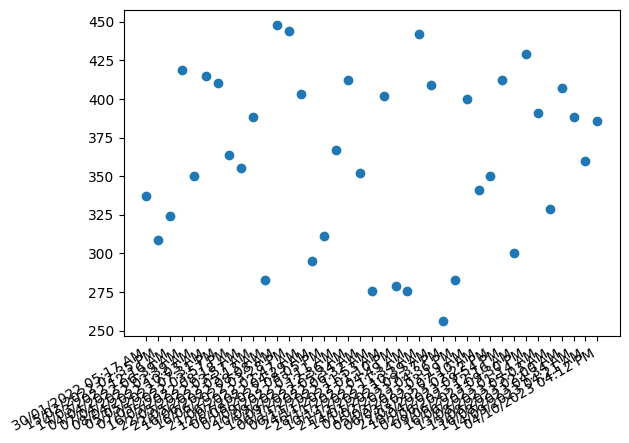

In [277]:
import pandas as pd
import numpy as np
import faker
import matplotlib.pyplot as plt
import datetime
import random

date_time = []
data =[]

f = open('jobs.json')
fileData = json.load(f)
f.close()

for i in range(5000):
    if fileData[i]['UserId'] == dicksSorted[-1][0]:
        date_time.append(fileData[i]['CreatedAt'])
        data.append(fileData[i]['TotalPayment'])

x = date_time
y = data

plt.scatter(x,y)
plt.gcf().autofmt_xdate()

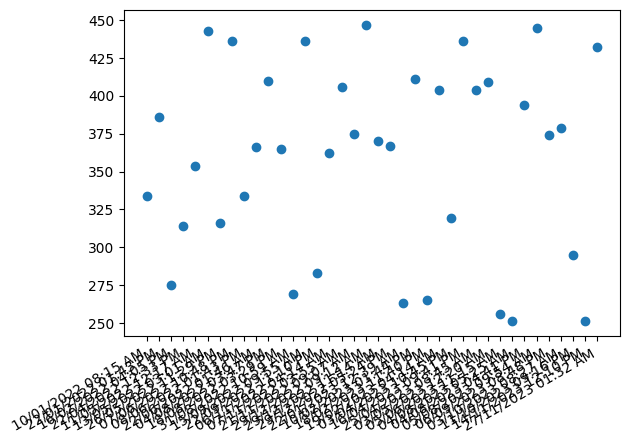

In [278]:
import pandas as pd
import numpy as np
import faker
import matplotlib.pyplot as plt
import datetime
import random

date_time = []
data =[]

f = open('jobs.json')
fileData = json.load(f)
f.close()

for i in range(5000):
    if fileData[i]['UserId'] == dicksSorted[-2][0]:
        date_time.append(fileData[i]['CreatedAt'])
        data.append(fileData[i]['TotalPayment'])

x = date_time
y = data

plt.scatter(x,y)
plt.gcf().autofmt_xdate()